# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Alma Notes/Machine Learning/Supervised Learning/Logistic Regression/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
def fn(x):
  if len(x) <= 1:
    return 0
  else:
    return eval(x)

In [7]:
dataset['TotalCharges'] = dataset['TotalCharges'].apply(lambda x: fn(x))

In [8]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
indexs = dataset[dataset['TotalCharges'] == 0].index

In [10]:
dataset.drop(indexs, axis=0, inplace=True)

# Numarical EDA

In [11]:
import warnings

warnings.filterwarnings('ignore')

In [12]:
numeric_features = list(set(dataset.describe().columns) - {'SeniorCitizen'})

In [13]:
numeric_features

['TotalCharges', 'tenure', 'MonthlyCharges']

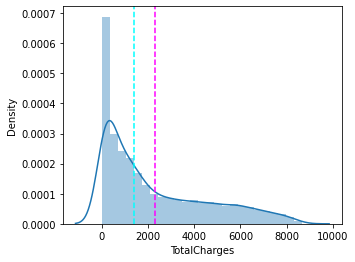

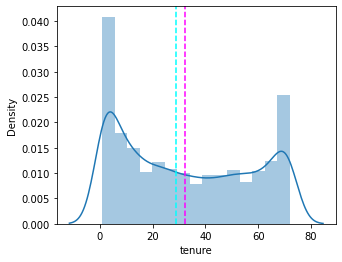

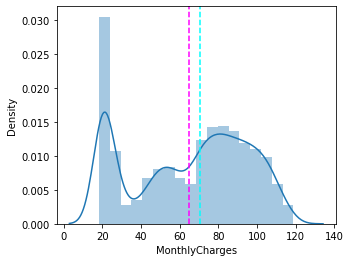

In [14]:
for col in numeric_features:
  plt.figure(figsize=(5,4))
  sns.distplot(dataset[col])
  plt.axvline(np.mean(dataset[col]), linestyle = 'dashed',  color='magenta')
  plt.axvline(np.median(dataset[col]), linestyle = 'dashed',  color='cyan')

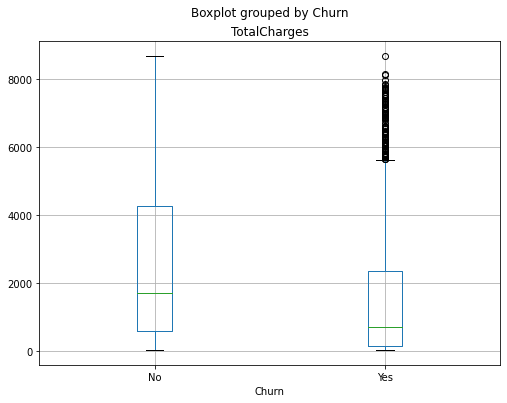

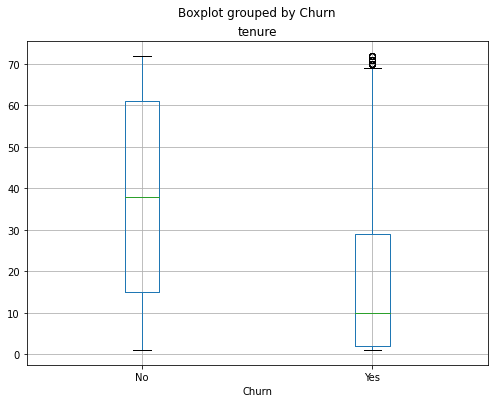

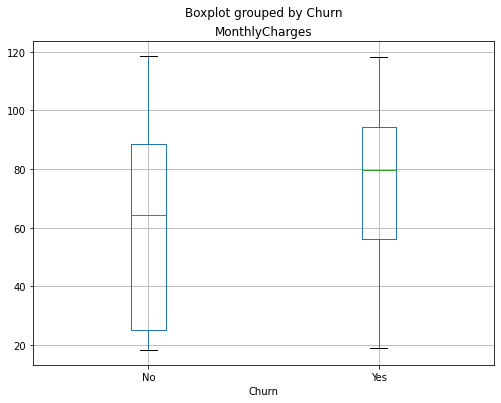

In [15]:
for col in numeric_features:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  dataset.boxplot(column=col, by= 'Churn', ax = ax)

In [16]:
dataset['Churn'] = np.where(dataset['Churn'] == 'No', 0, 1)

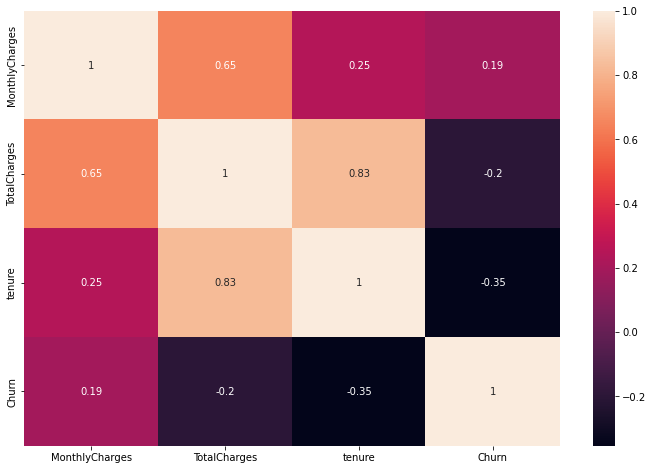

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(dataset[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']].corr(), annot=True)

In [18]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['SeniorCitizen','Churn', 'TotalCharges']]])

,variables,VIF
0,tenure,2.615492
1,MonthlyCharges,2.615492


#Categorical EDA

In [20]:
categorical_features = dataset.describe(include=['object', 'category']).columns

In [21]:
categorical_features = list(categorical_features)

In [22]:
categorical_features.append('SeniorCitizen')
categorical_features = list(set(categorical_features) - {'customerID'})

In [23]:
categorical_features

['SeniorCitizen',
 'OnlineSecurity',
 'PaymentMethod',
 'TechSupport',
 'PaperlessBilling',
 'gender',
 'StreamingTV',
 'OnlineBackup',
 'PhoneService',
 'MultipleLines',
 'Partner',
 'Contract',
 'DeviceProtection',
 'InternetService',
 'StreamingMovies',
 'Dependents']

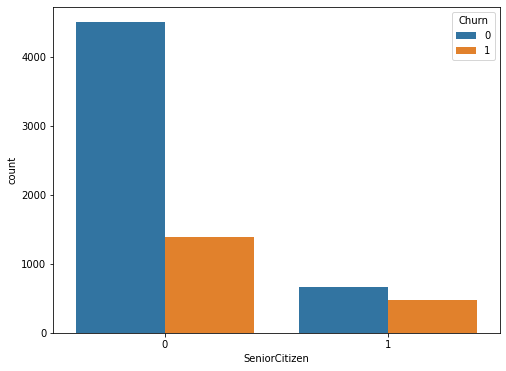

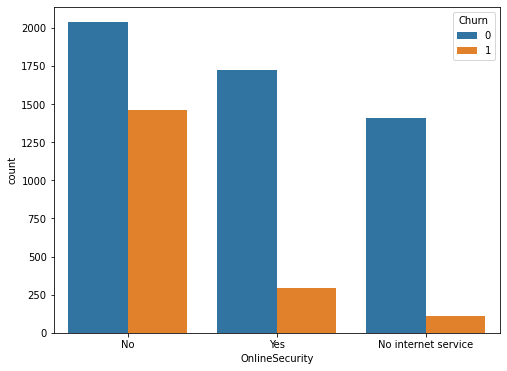

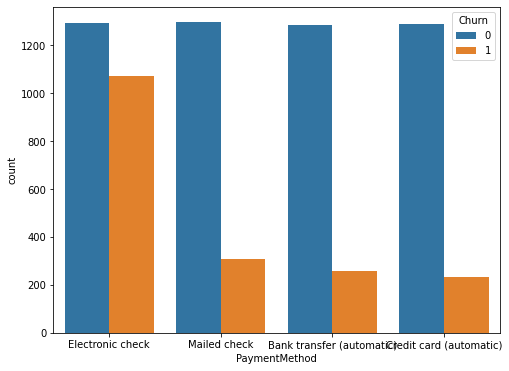

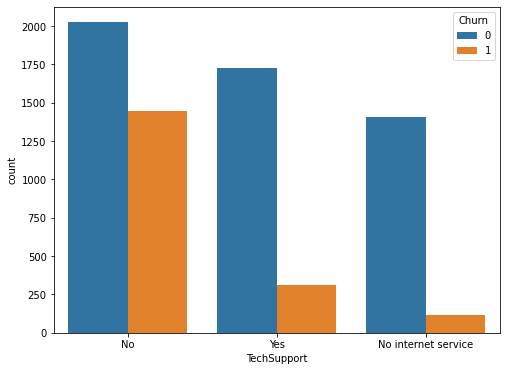

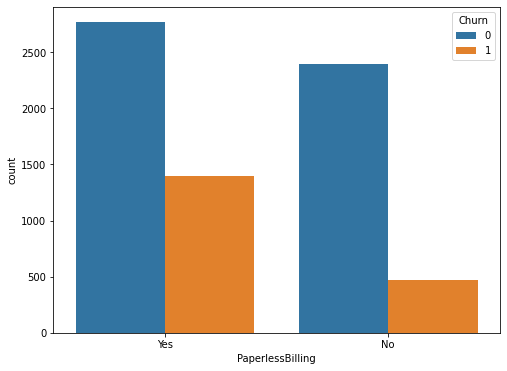

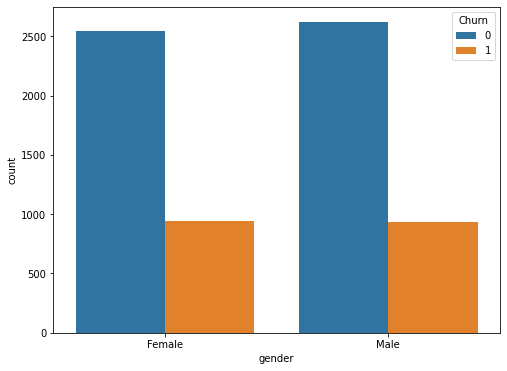

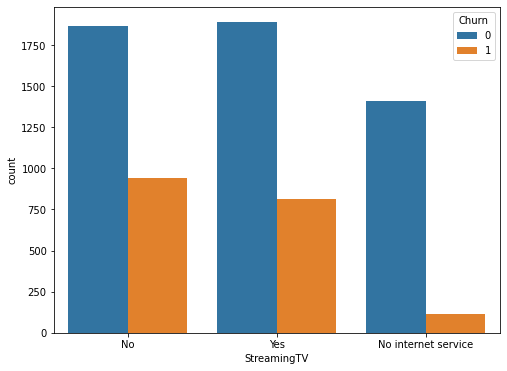

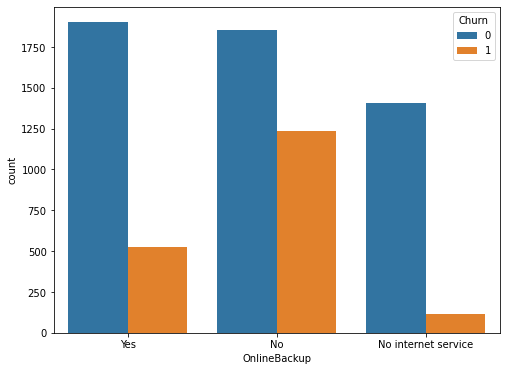

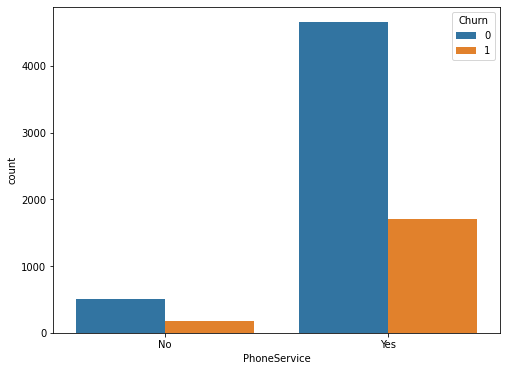

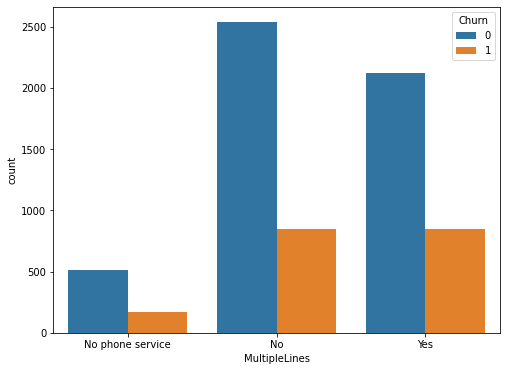

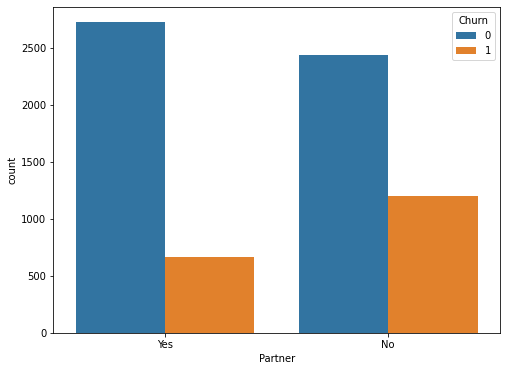

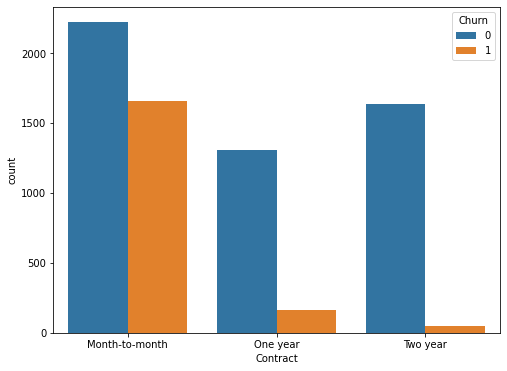

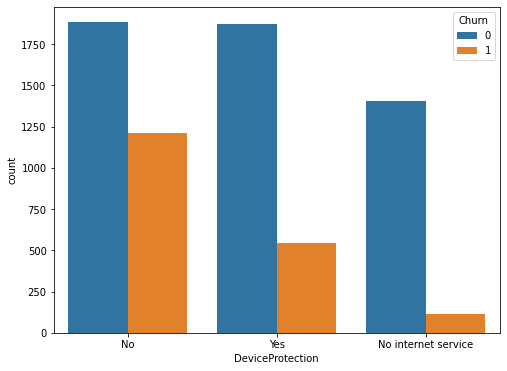

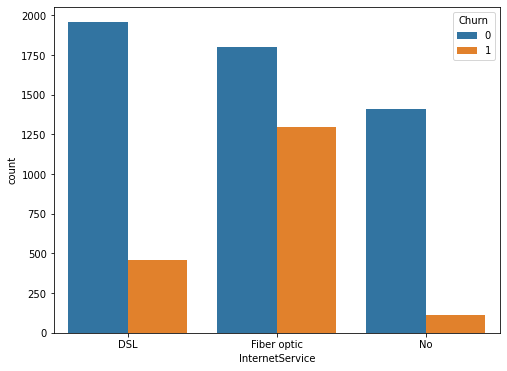

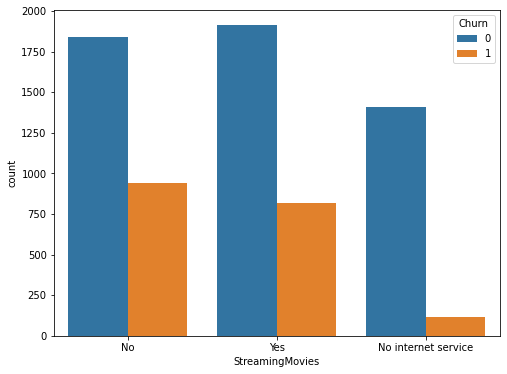

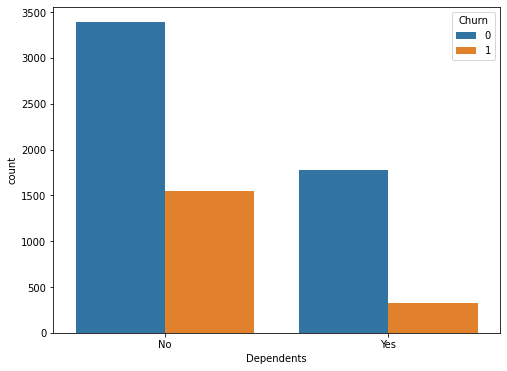

In [24]:
for col in categorical_features:
  plt.figure(figsize=(8,6))
  sns.countplot(x=col, data = dataset, hue='Churn')

In [25]:
df = dataset.copy()

In [44]:
#Data encoding
#label encoding
encoding = {
    'TechSupport': {'No' : 0, 'Yes': 1, 'No internet service': 0},
    'StreamingTV': {'No' : 0, 'Yes': 1, 'No internet service' : 0},
    'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 0},
    'OnlineBackup': {'No': 0, 'Yes': 1, 'No internet service': 0},
    'PaperlessBilling': {'No': 0, 'Yes': 1},
    'OnlineSecurity' : {'No':0, 'Yes': 1, 'No internet service': 0},
    'MultipleLines' : {'No': 0, 'Yes': 1, 'No phone service': 0},
    'Dependents' : {'No': 0, 'Yes': 1},
    'StreamingMovies' : {'No': 0, 'Yes' : 1, 'No internet service': 0},
    'gender': {'Female': 0, 'Male': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'Partner': {'No': 0, 'Yes': 1}
}

df = df.replace(encoding)

In [27]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [28]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [29]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [30]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], prefix=['NetSrvc', 'Cont', 'pMethod'])

In [31]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'NetSrvc_DSL', 'NetSrvc_Fiber optic', 'NetSrvc_No',
       'Cont_Month-to-month', 'Cont_One year', 'Cont_Two year',
       'pMethod_Bank transfer (automatic)', 'pMethod_Credit card (automatic)',
       'pMethod_Electronic check', 'pMethod_Mailed check'],
      dtype='object')


In [32]:
features = ['MonthlyCharges', 'tenure']
features.extend(['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'NetSrvc_DSL', 'NetSrvc_Fiber optic', 'NetSrvc_No',
       'Cont_Month-to-month', 'Cont_One year', 'Cont_Two year',
       'pMethod_Bank transfer (automatic)', 'pMethod_Credit card (automatic)',
       'pMethod_Electronic check', 'pMethod_Mailed check'])

In [33]:
features

['MonthlyCharges',
 'tenure',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'NetSrvc_DSL',
 'NetSrvc_Fiber optic',
 'NetSrvc_No',
 'Cont_Month-to-month',
 'Cont_One year',
 'Cont_Two year',
 'pMethod_Bank transfer (automatic)',
 'pMethod_Credit card (automatic)',
 'pMethod_Electronic check',
 'pMethod_Mailed check']

In [34]:
len(features)

27

In [35]:
df = df[features]

In [45]:
df.head()

,MonthlyCharges,tenure,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,NetSrvc_DSL,NetSrvc_Fiber optic,NetSrvc_No,Cont_Month-to-month,Cont_One year,Cont_Two year,pMethod_Bank transfer (automatic),pMethod_Credit card (automatic),pMethod_Electronic check,pMethod_Mailed check
0,29.85,1,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,56.95,34,1,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,53.85,2,1,0,0,0,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,42.30,45,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,70.70,2,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MonthlyCharges                     7032 non-null   float64
 1   tenure                             7032 non-null   int64  
 2   gender                             7032 non-null   int64  
 3   SeniorCitizen                      7032 non-null   int64  
 4   Partner                            7032 non-null   int64  
 5   Dependents                         7032 non-null   int64  
 6   PhoneService                       7032 non-null   int64  
 7   MultipleLines                      7032 non-null   int64  
 8   OnlineSecurity                     7032 non-null   int64  
 9   OnlineBackup                       7032 non-null   int64  
 10  DeviceProtection                   7032 non-null   int64  
 11  TechSupport                        7032 non-null   int64

In [51]:
X = df
Y = dataset['Churn']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [53]:
X_train.shape, X_test.shape

((5625, 27), (1407, 27))

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train  = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

###Implementation of Model

In [55]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=3000)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [56]:
clf.score(x_train, y_train)

0.8051555555555555

In [57]:
pred = clf.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

accuracy_score(y_test, pred)

0.8038379530916845

[[933 105]
 [171 198]]


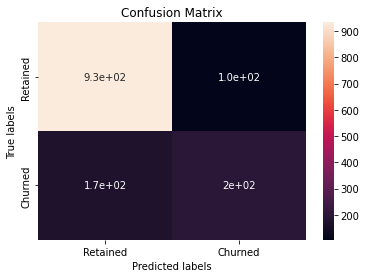

In [59]:
labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, pred)
print(cm)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
ax = plt.axes()
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

In [60]:
#Precision Score
prec = 198/(105+198)
print(f'Precicion Score is : {prec}')

#Recall Score
recall = 198 / (171+198)
print(f'Recall Score is : {recall}')

#F1 Score
f1_score = 2*(prec*recall) / (prec + recall)
print(f'F1 Score is : {f1_score}')

Precicion Score is : 0.6534653465346535
Recall Score is : 0.5365853658536586
F1 Score is : 0.5892857142857143


## <b><u>Implementing Cross-validated Logistic Regression

In [61]:
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

log_reg = LogisticRegression()
scoring = ['accuracy']

In [62]:
log_reg  = cross_validate(log_reg, X_train, y_train, scoring = scoring, cv=5)

In [63]:
np.mean(log_reg['test_accuracy'])

0.8012444444444444

## <b><u>Implementing Hyperparameter Tuning Logistic Regression

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator= model, param_grid= grid, n_jobs=1, cv=5, scoring= 'accuracy', error_score=0)
gride_result = grid_search.fit(X_train, y_train)

In [66]:
gride_result.best_score_, gride_result.best_params_

(0.8048, {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'})

In [67]:
y_pred  = gride_result.predict(X_test)

In [75]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)}')
print(f'Precesion Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Accuracy Score : 0.806680881307747
Precesion Score: 0.6559485530546624
Recall Score: 0.5528455284552846
F1 Score : 0.6000000000000001
